<h1><Center>Examen Intersemestral</Center></h1>

<h2><left>Data exploration</left></h2>

<h3>Importando librerias</h3>

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler


<h1>Reading the data</h1>

In [182]:
#Extractig the data from the files
train_data=pd.read_csv('../Data/train.csv')
test_data=pd.read_csv('../Data/test.csv')
#Selecting the specific data for the numbers an text
train_data_nums = train_data.select_dtypes(include=['int'])
train_data_text = train_data.loc[: , ['MSZoning','Neighborhood']]
#Adding the dataframe of text with the numbers for make the final dataframe
train_data_final=pd.concat([train_data_nums, train_data_text], axis=1)
#Showing the info of the dataframe for comprovation porpuses
train_data_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   LotArea        1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   OverallCond    1460 non-null   int64 
 5   YearBuilt      1460 non-null   int64 
 6   YearRemodAdd   1460 non-null   int64 
 7   BsmtFinSF1     1460 non-null   int64 
 8   BsmtFinSF2     1460 non-null   int64 
 9   BsmtUnfSF      1460 non-null   int64 
 10  TotalBsmtSF    1460 non-null   int64 
 11  1stFlrSF       1460 non-null   int64 
 12  2ndFlrSF       1460 non-null   int64 
 13  LowQualFinSF   1460 non-null   int64 
 14  GrLivArea      1460 non-null   int64 
 15  BsmtFullBath   1460 non-null   int64 
 16  BsmtHalfBath   1460 non-null   int64 
 17  FullBath       1460 non-null   int64 
 18  HalfBath       1460 non-null

<h2>Data Visualization</h2>

<h3>Extract the values from the dataframe</h3>

In [183]:
#Extracting the values from the data frame to numpy arrays
#Important you only need 5 of the columns list values not all
MSSubClass_train_list = train_data_final['MSSubClass'].values
MSSubClass_train_list = MSSubClass_train_list.reshape((train_data_final['MSSubClass'].values).shape[0],1)
LotArea_train_list = train_data_final['LotArea'].values
LotArea_train_list = LotArea_train_list.reshape((train_data_final['LotArea'].values).shape[0],1)
OverallQual_train_list = train_data_final['OverallQual'].values
OverallQual_train_list = OverallQual_train_list.reshape((train_data_final['OverallQual'].values).shape[0],1)
OverallCond_train_list = train_data_final['OverallCond'].values
OverallCond_train_list = OverallCond_train_list.reshape((train_data_final['OverallCond'].values).shape[0],1)
YearBuilt_train_list = train_data_final['YearBuilt'].values
YearBuilt_train_list = YearBuilt_train_list.reshape((train_data_final['YearBuilt'].values).shape[0],1)
YearRemodAdd_train_list = train_data_final['YearRemodAdd'].values
YearRemodAdd_train_list = YearRemodAdd_train_list.reshape((train_data_final['YearRemodAdd'].values).shape[0],1)
BsmtFinSF1_train_list = train_data_final['BsmtFinSF1'].values
BsmtFinSF1_train_list = BsmtFinSF1_train_list.reshape((train_data_final['BsmtFinSF1'].values).shape[0],1)
BsmtFinSF2_train_list = train_data_final['BsmtFinSF2'].values
BsmtFinSF2_train_list = BsmtFinSF2_train_list.reshape((train_data_final['BsmtFinSF2'].values).shape[0],1)
BsmtUnfSF_train_list = train_data_final['BsmtUnfSF'].values
BsmtUnfSF_train_list =  BsmtUnfSF_train_list.reshape((train_data_final['BsmtUnfSF'].values).shape[0],1)
TotalBsmtSF_train_list = train_data_final['TotalBsmtSF'].values
TotalBsmtSF_train_list = TotalBsmtSF_train_list.reshape((train_data_final['TotalBsmtSF'].values).shape[0],1)
FirstFlrSF_train_list = train_data_final['1stFlrSF'].values
FirstFlrSF_train_list = FirstFlrSF_train_list.reshape((train_data_final['1stFlrSF'].values).shape[0],1)
SecondFlrSF_train_list = train_data_final['2ndFlrSF'].values
SecondFlrSF_train_list = SecondFlrSF_train_list.reshape((train_data_final['2ndFlrSF'].values).shape[0],1)
LowQualFinSF_train_list = train_data_final['LowQualFinSF'].values
LowQualFinSF_train_list = LowQualFinSF_train_list.reshape((train_data_final['LowQualFinSF'].values).shape[0],1)
GrLivArea_train_list = train_data_final['GrLivArea'].values
GrLivArea_train_list = GrLivArea_train_list.reshape((train_data_final['GrLivArea'].values).shape[0],1)
BsmtFullBath_train_list = train_data_final['BsmtFullBath'].values
BsmtFullBath_train_list = BsmtFullBath_train_list.reshape((train_data_final['BsmtFullBath'].values).shape[0],1)
BsmtHalfBath_train_list = train_data_final['BsmtHalfBath'].values
BsmtHalfBath_train_list = BsmtHalfBath_train_list.reshape((train_data_final['BsmtHalfBath'].values).shape[0],1)
FullBath_train_list = train_data_final['FullBath'].values
FullBath_train_list = FullBath_train_list.reshape((train_data_final['FullBath'].values).shape[0],1)
HalfBath_train_list = train_data_final['HalfBath'].values
HalfBath_train_list = HalfBath_train_list.reshape((train_data_final['HalfBath'].values).shape[0],1)
BedroomAbvGr_train_list = train_data_final['BedroomAbvGr'].values
BedroomAbvGr_train_list = BedroomAbvGr_train_list.reshape((train_data_final['BedroomAbvGr'].values).shape[0],1)
KitchenAbvGr_train_list = train_data_final['KitchenAbvGr'].values
KitchenAbvGr_train_list = KitchenAbvGr_train_list.reshape((train_data_final['KitchenAbvGr'].values).shape[0],1)
TotRmsAbvGrd_train_list = train_data_final['TotRmsAbvGrd'].values
TotRmsAbvGrd_train_list = TotRmsAbvGrd_train_list.reshape((train_data_final['TotRmsAbvGrd'].values).shape[0],1)
Fireplaces_train_list = train_data_final['Fireplaces'].values
Fireplaces_train_list = Fireplaces_train_list.reshape((train_data_final['Fireplaces'].values).shape[0],1)
GarageCars_train_list = train_data_final['GarageCars'].values
GarageCars_train_list = GarageCars_train_list.reshape((train_data_final['GarageCars'].values).shape[0],1)
GarageArea_train_list = train_data_final['GarageArea'].values
GarageArea_train_list = GarageArea_train_list.reshape((train_data_final['GarageArea'].values).shape[0],1)
WoodDeckSF_train_list = train_data_final['WoodDeckSF'].values
WoodDeckSF_train_list = WoodDeckSF_train_list.reshape((train_data_final['WoodDeckSF'].values).shape[0],1)
OpenPorchSF_train_list = train_data_final['OpenPorchSF'].values
OpenPorchSF_train_list = OpenPorchSF_train_list.reshape((train_data_final['OpenPorchSF'].values).shape[0],1)
EnclosedPorch_train_list = train_data_final['EnclosedPorch'].values
EnclosedPorch_train_list = EnclosedPorch_train_list.reshape((train_data_final['EnclosedPorch'].values).shape[0],1)
ThirdSsnPorch_train_list = train_data_final['3SsnPorch'].values
ThirdSsnPorch_train_list = ThirdSsnPorch_train_list.reshape((train_data_final['3SsnPorch'].values).shape[0],1)
ScreenPorch_train_list = train_data_final['ScreenPorch'].values
ScreenPorch_train_list = ScreenPorch_train_list.reshape((train_data_final['ScreenPorch'].values).shape[0],1)
PoolArea_train_list = train_data_final['PoolArea'].values
PoolArea_train_list = PoolArea_train_list.reshape((train_data_final['PoolArea'].values).shape[0],1)
MiscVal_train_list = train_data_final['MiscVal'].values
MiscVal_train_list = MiscVal_train_list.reshape((train_data_final['MiscVal'].values).shape[0],1)
MoSold_train_list = train_data_final['MoSold'].values
MoSold_train_list = MoSold_train_list.reshape((train_data_final['MoSold'].values).shape[0],1)
YrSold_train_list = train_data_final['YrSold'].values
YrSold_train_list = YrSold_train_list.reshape((train_data_final['YrSold'].values).shape[0],1)
SalePrice_train_list = train_data_final['SalePrice'].values
SalePrice_train_list = SalePrice_train_list.reshape((train_data_final['SalePrice'].values).shape[0],1)

#Ploting the data in 2D scatters 2nd floor & Price
fig1 = go.Figure(data=[go.Scatter(x=list(SecondFlrSF_train_list[:,0]), y=list(SalePrice_train_list[:,0]),marker =dict(size=10, color= 'crimson', opacity= 0.6, symbol = 'diamond'),mode = 'markers')])
fig1.update_layout(
    title = {
        'text' : ' Houses in Iowa',
        'x': 0.5,
        'y': 0.8,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font = dict(
        family = 'agave NF',
        size = 20,
        color = 'Black'
    ),
    scene = dict(
        xaxis_title = 'Area 2nd Floor ',
        yaxis_title = 'Sale price '
    )

)
fig1.show()

#Ploting Pool Area & price
fig2 = go.Figure(data=[go.Scatter(x=list(PoolArea_train_list[:,0]), y=list(SalePrice_train_list[:,0]),marker =dict(size=10, color= 'blue', opacity= 0.8, symbol = 'circle'),mode = 'markers')])
fig2.update_layout(
    title = {
        'text' : ' Houses in Iowa',
        'x': 0.5,
        'y': 0.8,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font = dict(
        family = 'agave NF',
        size = 20,
        color = 'Black'
    ),
    scene = dict(
        xaxis_title = 'Area 2nd Floor ',
        yaxis_title = 'Sale price '
    )

)
fig2.show()

#Ploting Basement 1 area & price
fig3 = go.Figure(data=[go.Scatter(x=list(BsmtFinSF1_train_list[:,0]), y=list(SalePrice_train_list[:,0]),marker =dict(size=10, color= 'yellow', opacity= 0.6, symbol = 'square'),mode = 'markers')])
fig3.update_layout(
    title = {
        'text' : ' Houses in Iowa',
        'x': 0.5,
        'y': 0.8,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font = dict(
        family = 'agave NF',
        size = 20,
        color = 'Black'
    ),
    scene = dict(
        xaxis_title = 'Basement 1 area ',
        yaxis_title = 'Sale price '
    )

)
fig3.show()

#Ploting Basement 2 area & price 
fig4 = go.Figure(data=[go.Scatter(x=list(BsmtFinSF2_train_list[:,0]), y=list(SalePrice_train_list[:,0]),marker =dict(size=10, color= 'cyan', opacity= 0.9, symbol = 'circle-dot'),mode = 'markers')])
fig4.update_layout(
    title = {
        'text' : ' Houses in Iowa',
        'x': 0.5,
        'y': 0.8,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font = dict(
        family = 'agave NF',
        size = 20,
        color = 'Black'
    ),
    scene = dict(
        xaxis_title = 'Basement 2 area ',
        yaxis_title = 'Sale price '
    )

)
fig4.show()

#Ploting Garage & price
fig5 = go.Figure(data=[go.Scatter(x=list(GarageArea_train_list[:,0]), y=list(SalePrice_train_list[:,0]),marker =dict(size=10, color= 'pink', opacity= 0.8, symbol = 'circle'),mode = 'markers')])
fig5.update_layout(
    title = {
        'text' : ' Houses in Iowa',
        'x': 0.5,
        'y': 0.8,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font = dict(
        family = 'agave NF',
        size = 20,
        color = 'Black'
    ),
    scene = dict(
        xaxis_title = 'Garage area ',
        yaxis_title = 'Sale price '
    )

)
fig5.show()
#Ploting a 3D scatter for the Wood deck SF and PorchSF on the price 
fig6 = go.Figure(data=[go.Scatter3d(x=list(WoodDeckSF_train_list[:,0]), y=list(OpenPorchSF_train_list[:,0]), z=list(SalePrice_train_list[:,0]), marker =dict(size=6, color= 'black', opacity= 0.6, symbol = 'circle'),mode = 'markers')])
fig6.update_layout(
    title = {
        'text' : ' Houses in Iowa',
        'x': 0.5,
        'y': 0.8,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font = dict(
        family = 'agave NF',
        size = 15,
        color = 'Black'
    ),
    scene = dict(
        xaxis_title = 'Wood Deck SF [ft^2]',
        yaxis_title = 'Open Porch SF [ft^2]',
        zaxis_title = 'Sale Price $'
    )

)
fig6.show()

<h2>Data pre-procesing</h2>
<h3>Hot encoding the two text columns</h3>

In [184]:
#Hot encoding the text columns
hot_econded_zoning = pd.get_dummies(train_data_text.MSZoning, prefix="MSZoning")
hot_encoded_neighborhood = pd.get_dummies(train_data_text.Neighborhood, prefix="Neighborhood")
hot_encoded_all=pd.concat([hot_econded_zoning, hot_encoded_neighborhood], axis=1)
train_data_final = pd.concat([train_data_final, hot_encoded_all], axis=1)
train_data_final = train_data_final.drop(['MSZoning', 'Neighborhood','Id','SalePrice'], axis=1)



<h3>Creating the arrays for the LMS</h3>

In [185]:
x_array = train_data_final.to_numpy()
y_array = SalePrice_train_list

#Spliting the data in 70% and 30% 
x_len = len(x_array)
slice_number = round(x_len*.7)
x_train = x_array[0:slice_number,:]
x_test = x_array[slice_number::,:]
y_train = y_array[0:slice_number,:]
y_test = y_array[slice_number::,:]

<h3>Data normalization</h3>

In [186]:
#Data normalization
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_normalized = scaler.transform(x_train)
scaler.fit(x_test)
x_test_normalized = scaler.transform(x_test)
scaler.fit(y_train)
y_train_normalized = scaler.transform(y_train)
scaler.fit(y_test)
y_test_normalized = scaler.transform(y_test)
#Checking the shape of the vectors
print('Shape of the normalized vectors:')
print(x_train_normalized.shape)
print(x_test_normalized.shape)
print(y_train_normalized.shape)
print(y_test_normalized.shape)

Shape of the normalized vectors:
(1022, 63)
(438, 63)
(1022, 1)
(438, 1)


<h2>Linear Regression - Gradient Descent </h2>

<p>Best vector of weigths after all interations
a list with the training errors
a list of validation error</p>

<h3>Hypotesis function</h3>

In [187]:
def h(w, x):
    """
    params: 
        w: [np_array] a vector of weights with dimensions (1xn), where n represents the number of weights.
        x: [np_array] a vector of feature variables with dimensions (nxm), 
            where n represents the number of feature variables and m the number of training examples
        returns:
            h: [double] the estimation performed by the linear model h=w'*x
    """
    return w.T.dot(x)

<h3>Cost function</h3>

In [188]:
def cost(w, x, y):
    """
        params:
            w: [np_array] a vector of weights with dimensions (nx1), where n represents the number of weights.
            x: [np_array] a vector of feature variables with dimensions (nxm), 
                where n represents the number of feature variables and m the number of training examples
            y: [np_array] a vector of feature variables with dimensions (mx1), 
                where m represents the number of target variables
        returns:
            cost: [double] the mean squared error
    """
    return (1/(2*x.shape[1])) * (np.sum(np.square(h(w, x).T-y)))

<h3>Gradient cost function</h3>

In [189]:
def dJ(w, x, y):
    """
        params:
            w: [np_array] a vector of weights with dimensions (nx1), where n represents the number of weights.
            x: [np_array] a vector of feature variables with dimensions (nxm), 
                where n represents the number of feature variables and m the number of training examples
            y: [np_array] a vector of feature variables with dimensions (mx1), 
                where m represents the number of target variables
        returns:
            dJ: [double] the derivative of the mean squared error
    """
    e = h(w, x).T - y
    return (1 / (x.shape[1])) * np.dot(x, e)

<h3>LMS algorithm</h3>

In [190]:
def optimize_LMS(x, y, num_iter, alpha, w = None):
    """
    We calculate gradient descent for minimizing the MSE to obtain the best linear hypothesis.
        params:
            x: [np_array] a vector of feature variables with dimensions (nxm), 
                where n represents the number of feature variables and m the number of training examples
            y: [np_array] a vector of feature variables with dimensions (mx1), 
                where m represents the number of target variables
            num_iter: [int] an integer indicating the number of iterations of the Gradient Descent algorithm
            alpha: [double] learning rate constant specifying the magnitude update step
            w: [np_array] vector that contains the initial weights to start optimzing the model with dimensions (n x 1)
                
        return:
            j: [np_array] a vector (num_iter x 1) containing all cost function evaluations during training
            w: [np_array] a vector of the final optimized weights with dimensions (nx1)
            e: [np_array] a vector (num_iter x 1) containing all the error evaluations during training
    """
    
    if w is None:
        # We initialize the vector of weights randomly
        w = np.random.randn(x.shape[0], 1)
    
    # We create a vector that will contain the cost function evaluated
    # at each iteration of the gradient descent algortihm.
    j = np.zeros(num_iter)
    
    # We update the weights using gradient descent 
    # by the specified number of iterations
    for i in range(num_iter):

        # We compute the hypothesis (predict)
        preds = h(w, x)

        # We update the weights using the gradient descent rule. 
        w = w - alpha * dJ(w, x, y)

        # We save the cost for the current iteration of gradient descent
        j[i] = cost(w, x, y)

        
    return w, j

<h3>Impletation of the algorithm</h3>

Iterations: 31


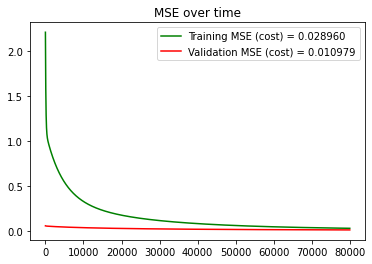

In [197]:
#Calling the vectors for working in the optimize_LMS
x_train_normalized_transpose = np.transpose(x_train_normalized)
x_test_normalized_transpose = np.transpose(x_test_normalized)
y_train_normalized
y_test_normalized
runs= 1
while True:
    #Defining the max interations of the algorithm
    max_iterations = 80000
    #Defining the alpha or learging rate of the algorithm
    alpha = 0.001
    #Run the algorithm for trainin and validation
    w_train, j_train = optimize_LMS(x_train_normalized_transpose, y_train_normalized, max_iterations, alpha, None)
    w_validation, j_validation = optimize_LMS(x_test_normalized_transpose, y_test_normalized, max_iterations, alpha, w_train)
    j_train=j_train.reshape(j_train.shape[0],1)
    j_validation=j_validation.reshape(j_validation.shape[0],1)

    
    #Chechikg the label with the training data
    x_testing_slice = x_test_normalized[15,:]
    x_testing_slice = x_testing_slice.reshape(x_testing_slice.shape[0],1)
    hypothesis = h(w_validation, x_testing_slice)
    h_error= float(abs(y_test_normalized[15][0]-hypothesis))
    
    if (h_error <= 0.01):
        break
    runs+=1
  
print("Iterations: " + str(runs))
j_train_min = j_train.min()
j_validation_min = j_validation.min()

#Saving the weigths vecotor on a text file
file = open("../temp/weights.txt",'w')
file.write(""+str(w_validation))
file.close()

#Ploting the MSE functions
fig, ax = plt.subplots()
ax.plot(j_train, color = 'green', label = 'Training MSE (cost) = %f' %j_train_min)
ax.plot(j_validation, color = 'red', label = 'Validation MSE (cost) = %f' %j_validation_min)
ax.legend(loc = 'upper right')
plt.title('MSE over time')
plt.savefig('../temp/MSE_over_time.png')
plt.show()


In [200]:
#Calculing the price & chechikng the price 
x_testing_slice = x_test_normalized[15,:]
x_testing_slice = x_testing_slice.reshape(x_testing_slice.shape[0],1)
print("Normalized target label: "+str(y_test_normalized[15][0]))
print("Normalized adquierd label: "+str(hypothesis)+" normalized error: "+str(float(h_error)))
price = int(scaler.inverse_transform(hypothesis))
print("Target real price: $ "+str(y_test[15][0]))
dif_price= int(y_test[15][0]-price)
print("Predicted price: $ "+str(price)+" diference: "+str(dif_price))


Normalized target label: 0.3386281588447654
Normalized adquierd label: [[0.34226793]] normalized error: 0.0036397694188397
Target real price: $ 287000
Predicted price: $ 289520 diference: -2520
